In [ ]:
def hanoi(n, A='A', B='B', C='C'):
    if n == 0:
        print(f"No hay fichas que mover")
        return 
    if n == 1:
        print(f"Mueva de {A} a {C}") # moviendo el unico disco en A hasta C
        return
    hanoi(n-1, A, C, B)          # moviendo n-1 discos de A hasta B
    print(f"Mueva de {A} a {C}") # moviendo el unico disco de A a C
    hanoi(n-1, B, A, C)          # moviendo n -1 discos de B hasta C

In [ ]:
def merge(a:'list[int]', b:'list[int]') -> 'list[int]': # que haga el merge de las dos listas, ordenadas, asuma de menor a mayor a y b
    newList = []
    posA = 0;
    posB = 0;
    while posA < len(a) and posB < len(b):
        if a[posA] < b[posB]:
            newList.append(a[posA])
            posA += 1
        else:
            newList.append(b[posB])
            posB += 1
    while posA < len(a):
        newList.append(a[posA])
        posA += 1
    while posB < len(b):
        newList.append(b[posB])
        posB += 1
    return newList
     
a = [1,3,5,7,9]
b = [0,2,4,6,8]
c = list(range(10))
d = list(range(20))

print(merge(a,b))
print(merge(c,d))

In [1]:
def merge(a:'list[int]', b:'list[int]') -> 'list[int]': # que haga el merge de las dos listas, ordenadas, asuma de menor a mayor a y b
    newList = []
    posA = 0;
    posB = 0;
    while posA < len(a) and posB < len(b):
        if a[posA] < b[posB]:
            newList.append(a[posA])
            posA += 1
        else:
            newList.append(b[posB])
            posB += 1
    if posA < len(a):
        newList += a[posA:]
    if posB < len(b):
        newList += b[posB:]
    return newList

a = [1,3,5,7,9]
b = [0,2,4,6,8]
c = list(range(10))
d = list(range(20))

print(merge(a,b))
print(merge(c,d))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Haga los 6 pasos del tiempo de corrida de su función anterior. Asuma comparaciones entre elementos de a y b como la operación de interés. Sugerencia: Use n = len(a) + len(b) como el tamaño de los datos. No asuma que a y b son del mismo tamaño, necesariamente.

Paso 1:
n = len(a) + len(b), a y b son listas

Paso 2:
Operaciones de interés = $T_{<}$

Paso 3:
n = 0, significa que len(a) y len(b) son 0
$T_0 = 0$

no estoy seguro como poner el $T_n$ porque el $T_n = 2*len(lista más pequeño)$ o $T_n = 2*len(lista)$ si las listas son iguales.

Ergo $T_n = 2*n/2$ o $T_n = 2*n/2 -1$ aproximadamente

Paso 5: $T_n ~ O(n/2)$

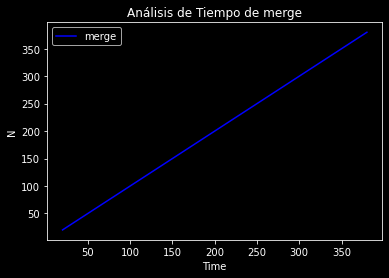

In [3]:
import matplotlib.pyplot  as plt
import numpy as np

# El sexto paso del análisis
def merge_instrumentado(a:'list[int]', b:'list[int]') -> int:
    operaciones = 0
    newList = []
    posA = 0;
    posB = 0;
    while posA < len(a) and posB < len(b):
        operaciones += 1
        if a[posA] < b[posB]:
            newList.append(a[posA])
            posA += 1
        else:
            newList.append(b[posB])
            posB += 1
    if posA < len(a):
        newList += a[posA:]
        operaciones += len(a) - posA
    if posB < len(b):
        newList += b[posB:]
        operaciones += len(b) - posB
    return operaciones

def test_merge_instrumentado(start, end, inc):
    graph = []
    graph.append([])
    graph.append([])
    graph.append([])
    for i in range(start, end, inc):
        for j in range(i, end, inc):
            a = list(range(i))
            b = list(range(j))
            graph[0].append(i+j)
            graph[1].append(merge_instrumentado(a,b))
    return graph
            

g = test_merge_instrumentado(10, 200, 10)
g.append([])
for i in range(len(g[0])):
    g[2].append(g[0][i] - g[1][i])


plt.plot(g[0], g[1], color="blue", label="merge") 
plt.legend()
plt.xlabel('Time')
plt.ylabel("N")
plt.title("Análisis de Tiempo de merge")
plt.show()

In [ ]:
def mergesort(a:list[int]) -> list[int]:
    def merge(a:list[int], b:list[int]) -> list[int]:
        newList = []
        if len(a) == 1 and len(b) == 0:
            return [a[0]]
        elif len(a) == 0 and len(b) == 1:
            return [b[0]]
        elif len(a) == 1 and len(b) == 1:
            if a[0] < b[0]:
                return [a[0],b[0]]
        else:
            return newList + merge(a[:len(a)//2], a[len(a)//2:]) + merge(b[:len(b)//2], b[len(b)//2:])
    merge(a[:len(a)//2], a[len(a)//2:])

a = [0,1,7,3,4,9,6,20,8,5]
print(mergesort(a))

# Este fue un intento fallido

In [1]:
# use su merge de 2) para escribir mergesort(a:list[int]) -> list[int] que implemente el merge sort descrito en clase.
def mergesort(a:list[int]) -> list[int]:
    def merge(a:list[int], b:list[int]) -> list[int]: # que haga el merge de las dos listas, ordenadas, asuma de menor a mayor a y b
        newList = []
        posA = 0
        posB = 0
        if len(a) == 1 and len(b) == 0:
            return a
        elif len(a) == 0 and len(b) == 1:
            return b
        
        while posA < len(a) and posB < len(b):
            if a[posA] < b[posB]:
                newList.append(a[posA])
                posA += 1
            else:
                newList.append(b[posB])
                posB += 1
        while posA < len(a):
            newList.append(a[posA])
            posA += 1
        while posB < len(b):
            newList.append(b[posB])
            posB += 1
        return merge(merge(a[:len(a)//2], a[len(a)//2:]), merge(b[:len(b)//2], b[len(b)//2:]))
    merge(a[:len(a)//2], a[len(a)//2:])
    
a = [0,1,7,3,4,9,6,20,8,5]
print(mergesort(a))

# este fue un intento fallido

RecursionError: maximum recursion depth exceeded while calling a Python object

In [10]:
def mergesort(a:list[int]) -> list[int]:
    def merge(a:'list[int]', b:'list[int]') -> 'list[int]': # que haga el merge de las dos listas, ordenadas, asuma de menor a mayor a y b
        newList = []
        posA = 0;
        posB = 0;
        while posA < len(a) and posB < len(b):
            if a[posA] < b[posB]:
                newList.append(a[posA])
                posA += 1
            else:
                newList.append(b[posB])
                posB += 1
        while posA < len(a):
            newList.append(a[posA])
            posA += 1
        while posB < len(b):
            newList.append(b[posB])
            posB += 1
        return newList
    sorted = merge(a[:1], a[1:2])
    for i in range(2, len(a)-1):
        sorted = merge(sorted, a[i:i+1])
    return merge(sorted, a[len(a)-1:])

a = [0,1,7,3,4,9,6,20,8,5]
print(mergesort(a))

# intento mio que creo que es mas instertion sort que cualquier cosa
        

[0, 1, 3, 4, 5, 6, 7, 8, 9, 20]


In [24]:
def mergesort(a:list[int]) -> list[int]:
    if len(a) <= 1:
        return a
    return merge(mergesort(a[:len(a)//2]), mergesort(a[len(a)//2:]))

def merge(a:'list[int]', b:'list[int]') -> 'list[int]': # que haga el merge de las dos listas, ordenadas, asuma de menor a mayor a y b
    newList = []
    posA = 0;
    posB = 0;
    while posA < len(a) and posB < len(b):
        if a[posA] < b[posB]:
            newList.append(a[posA])
            posA += 1
        else:
            newList.append(b[posB])
            posB += 1
    while posA < len(a):
        newList.append(a[posA])
        posA += 1
    while posB < len(b):
        newList.append(b[posB])
        posB += 1
    return newList

a = [0,1,7,3,4,9,6,20,8,5]
print(mergesort(a))

# Despues de ver solucion de google descubri que no estaba tan lejos de la respuesta

[0, 1, 3, 4, 5, 6, 7, 8, 9, 20]


In [2]:
def mergesort(a:list[int]) -> list[int]:
    if len(a) <= 1:
        return a
    return merge(mergesort(a[:len(a)//2]), mergesort(a[len(a)//2:]))

def merge(a:'list[int]', b:'list[int]') -> 'list[int]': # que haga el merge de las dos listas, ordenadas, asuma de menor a mayor a y b
    newList = []
    posA = 0;
    posB = 0;
    while posA < len(a) and posB < len(b):
        if a[posA] < b[posB]:
            newList.append(a[posA])
            posA += 1
        else:
            newList.append(b[posB])
            posB += 1
    if posA < len(a):
        newList += a[posA:]
    if posB < len(b):
        newList += b[posB:]
    return newList

a = [0,1,7,3,4,9,6,20,8,5]
print(mergesort(a))

[0, 1, 3, 4, 5, 6, 7, 8, 9, 20]


In [15]:
def merge_sort(arr):
    # The last array split
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    # Perform merge_sort recursively on both halves
    left, right = merge_sort(arr[:mid]), merge_sort(arr[mid:])

    # Merge each side together
    return merge(left, right, arr.copy())


def merge(left, right, merged):

    left_cursor, right_cursor = 0, 0
    while left_cursor < len(left) and right_cursor < len(right):
      
        # Sort each one and place into the result
        if left[left_cursor] <= right[right_cursor]:
            merged[left_cursor+right_cursor]=left[left_cursor]
            left_cursor += 1
        else:
            merged[left_cursor + right_cursor] = right[right_cursor]
            right_cursor += 1
            
    for left_cursor in range(left_cursor, len(left)):
        merged[left_cursor + right_cursor] = left[left_cursor]
        
    for right_cursor in range(right_cursor, len(right)):
        merged[left_cursor + right_cursor] = right[right_cursor]

    return merged

a = [0,1,7,3,4,9,6,20,8,5]
print(merge_sort(a))

[0, 1, 3, 4, 5, 6, 7, 8, 9, 20]


In [26]:
# Escriba sumDyC(a:list[int]) -> int que usando un enfoque DyC calcule la suma de los elementos de a. Use MT para determinar el O-grande de T_SumDyC(n). Indique al usar MT si es simple o general
def sumDyC(a:list[int]) -> int:
    if len(a) == 1:
        return a[0]
    return sumDyC(a[:len(a)//2]) + sumDyC(a[len(a)//2:])

a = [1,2,3,4,5,6,7,8,9]
print(sumDyC(a))

45


Hay 2 llamadas recursivas y se divide por 2, entonces a y b son 2, no se le suma nada demás entonces solo $f_n = a*f_{n/2}$, lo cual es igual a un O-grande de $O(n^{log_b(a)}) = O(n^{log_2(2)}) = O(n)$